In [1]:
# import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 1. Criminal investigation

In [2]:
df = pd.read_excel('phone_data.xlsx')
df

,Date,Start time,From city,To city,Number called (to/from),Call type,Duration,Grand Total
0,10-14-2019,12:53:34 PM,INCOMING ON,TORONTO ON,Unknown caller,Incoming,1,0
1,10-13-2019,11:47:28 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,7,0
2,10-13-2019,11:46:53 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
3,10-13-2019,11:46:15 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
4,10-11-2019,07:03:08 PM,TORONTO ON,TORONTO ON,A_3,Outgoing,37,0
...,...,...,...,...,...,...,...,...
333,10-15-2019,11:41:22 AM,TORONTO ON,TORONTO ON,A_5,Outgoing,1,$0.00
334,10-15-2019,11:11:44 AM,TORONTO ON,TORONTO ON,D_3,Outgoing,9,$0.00
335,10-15-2019,11:06:17 AM,TORONTO ON,TORONTO ON,A_4,Outgoing,4,$0.00
336,10-15-2019,11:05:05 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,1,$0.00


### 1.2 Most and least frequent outgoing numbers
###### 1. Identify the 3 numbers with the most counts of outgoing calls.
Final answer format: two tables that include two columns: the numbers the suspect
called; the counts of times the respective numbers were called.

In [3]:
# 'Call type': Incoming, Outgoing
outgoing_call = df[df['Call type'] == 'Outgoing']
outgoing_call_frequent = outgoing_call.groupby('Number called (to/from)').count()
outgoing_call_frequent = outgoing_call_frequent.sort_values('Date',ascending=False)
outgoing_call_frequent 

,Date,Start time,From city,To city,Call type,Duration,Grand Total
Number called (to/from),,,,,,,
A_1,111,111,111,111,111,111,111
A_5,48,48,48,48,48,48,48
B_3,28,28,28,28,28,28,28
A_4,12,12,12,12,12,12,12
B_2,4,4,4,4,4,4,4
C_4,3,3,3,3,3,3,3
B_4,3,3,3,3,3,3,3
E_1,3,3,3,3,3,3,3
E_3,3,3,3,3,3,3,3


In [4]:
result_121 = outgoing_call_frequent.iloc[0:3,0:1] 
result_121.columns = ['count']
print ('3 numbers with the most counts of outgoing calls:')
result_121

3 numbers with the most counts of outgoing calls:


,count
Number called (to/from),
A_1,111
A_5,48
B_3,28


##### 2. Identify the numbers with the least counts of outgoing calls. If there are ties (e.g. 1 phone call for many numbers) then identify all numbers.

In [5]:
# least counts of outgoing calls = 1
min_count = outgoing_call_frequent['Date'].min()

outgoing_call_frequent_least = outgoing_call_frequent[outgoing_call_frequent['Date'] == min_count]
result_122 = outgoing_call_frequent_least.iloc[:,0:1]
result_122.columns = ['count']
print('numbers with the least counts of outgoing calls:')
result_122

numbers with the least counts of outgoing calls:


,count
Number called (to/from),
F_2,1
F_4,1
F_3,1
E_5,1
F_5,1
F_1,1
D_2,1
E_4,1
D_5,1


### 1.3 Highest and lowest total duration of outgoing calls
##### 1. Repeat the same exercise as in the previous subsection, but with the total duration per number called.
Final answer format: two tables that include two columns: the numbers the suspect
called; the total duration (i.e. sum) each number were called in the period given.

In [6]:
outgoing_call_duration = outgoing_call.groupby('Number called (to/from)').sum()
outgoing_call_duration = outgoing_call_duration.sort_values('Duration',ascending=False)
outgoing_call_duration

,Duration
Number called (to/from),
A_1,1146
A_5,427
A_4,96
A_3,81
C_4,37
B_3,33
F_2,32
F_1,17
B_5,16


In [7]:
print ('3 numbers with the highest duration of outgoing calls:')
result_131 = outgoing_call_duration.iloc[0:3] 
result_131

3 numbers with the highest duration of outgoing calls:


,Duration
Number called (to/from),
A_1,1146
A_5,427
A_4,96


In [8]:
outgoing_call_duration['Duration'].min()

1

In [9]:
# lowest duration of outgoing calls = 1
min_duration = outgoing_call_duration['Duration'].min()

print('numbers with the lowest duration of outgoing calls:')
outgoing_call_duration[outgoing_call_duration['Duration'] == min_duration]

numbers with the lowest duration of outgoing calls:


,Duration
Number called (to/from),
D_5,1
E_4,1
E_5,1
C_1,1


### 1.4 Location of outgoing calls
##### 1. What are the number of counts for every location of outgoing calls?
Final answer format: a table that includes two columns: the location of the outgoing call;
the counts of outgoing calls per location. 

In [10]:
outgoing_call_location = outgoing_call.groupby('From city').count()
outgoing_call_location = outgoing_call_location.sort_values('Duration',ascending=False)
outgoing_call_location

,Date,Start time,To city,Number called (to/from),Call type,Duration,Grand Total
From city,,,,,,,
TORONTO ON,244,244,244,244,244,244,244
NEWMARKET ON,2,2,2,2,2,2,2
CLAREMONT ON,1,1,1,1,1,1,1


In [11]:
result_141 = outgoing_call_location.iloc[:,0:1] 
result_141.columns = ['count']
print ('number of counts for every location of outgoing calls:')
result_141

number of counts for every location of outgoing calls:


,count
From city,
TORONTO ON,244
NEWMARKET ON,2
CLAREMONT ON,1


### 1.5 Incoming and Outgoing calls pattern
##### 1. Calculate the total duration of incoming and outgoing calls per month.
Final answer format #1: a table that includes three columns: the month, the total
duration of the incoming calls per month; the total duration of the outgoing calls per month.

In [12]:
# create new column: month
df['month'] = df['Date'].str.strip().str.split('-',expand=True)[0] 
df

,Date,Start time,From city,To city,Number called (to/from),Call type,Duration,Grand Total,month
0,10-14-2019,12:53:34 PM,INCOMING ON,TORONTO ON,Unknown caller,Incoming,1,0,10
1,10-13-2019,11:47:28 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,7,0,10
2,10-13-2019,11:46:53 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0,10
3,10-13-2019,11:46:15 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0,10
4,10-11-2019,07:03:08 PM,TORONTO ON,TORONTO ON,A_3,Outgoing,37,0,10
...,...,...,...,...,...,...,...,...,...
333,10-15-2019,11:41:22 AM,TORONTO ON,TORONTO ON,A_5,Outgoing,1,$0.00,10
334,10-15-2019,11:11:44 AM,TORONTO ON,TORONTO ON,D_3,Outgoing,9,$0.00,10
335,10-15-2019,11:06:17 AM,TORONTO ON,TORONTO ON,A_4,Outgoing,4,$0.00,10
336,10-15-2019,11:05:05 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,1,$0.00,10


In [13]:
pt = df.pivot_table(values='Duration', index='month', columns='Call type',aggfunc='sum')
pt

Call type,Incoming,Outgoing
month,,
07,84,190
08,54,281
09,244,714
10,63,621
11,87,196


##### 2. Plot the results in one graph for both incoming and outgoing calls.
Final answer format #2: a plot of the table in #1 with two lines and square symbols to
show the data with the plot legend showing which line is incoming and which line is outgoing.

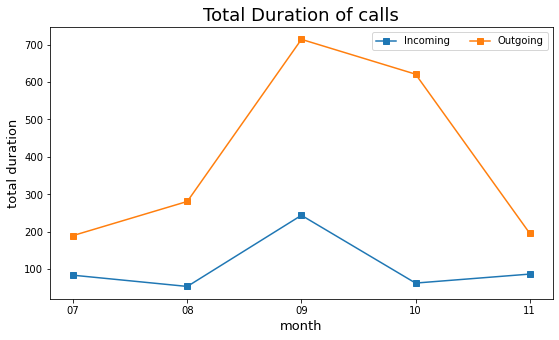

In [14]:
fig = plt.figure(figsize=(9,5))
plt.plot(pt.index, pt, '-s')
plt.title('Total Duration of calls', fontsize=18)
plt.xlabel('month', fontsize=13)
plt.ylabel('total duration', fontsize=13)
plt.legend(pt.columns, loc='best', ncol=3)
plt.show()

##### 3. Do you see anything unusual in the pattern? E.g. does this look like a phone line that was used for criminal activities or more like a personal phone?
Hint for #3:Use all the information you derived in the previous questions.

In [15]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.pivot_table(values='Duration', index=['month','Number called (to/from)'], columns='Call type',aggfunc='sum'))

Call type                      Incoming  Outgoing
month Number called (to/from)                    
07    A_1                           NaN     151.0
      A_4                           NaN       1.0
      B_2                           NaN       4.0
      B_3                           NaN       8.0
      E_2                           NaN       3.0
      E_3                           NaN       4.0
      E_4                           NaN       1.0
      E_5                           NaN       1.0
      F_1                           NaN      17.0
      Unknown caller               84.0       NaN
08    A_1                           NaN     187.0
      A_4                           NaN       3.0
      A_5                           NaN      58.0
      B_3                           NaN       8.0
      B_4                           NaN       2.0
      C_4                           NaN      20.0
      C_5                           NaN       1.0
      D_4                           NaN       1.0


In [16]:
# I think this phone line is more likely to be used for criminal activities, and here're some unusual things: 

# 1. There're 247 outgoing calls with total duration 2002, but only 91 incoming calls with total duration of 532.
# The numbers with the most counts of outgoing calls never call back, and all incoming calls are from unknown 
# caller. Personal phone would have more connections to others.  

# 2. This phone line is more active in Sep compare to other months, personal phone would have more even levels of 
# activity.

### 1.6 Distribution of calls
Plot the histogram of the outbound call counts; e.g. x-axis: the call counts per client called, y-axis: number of clients called.

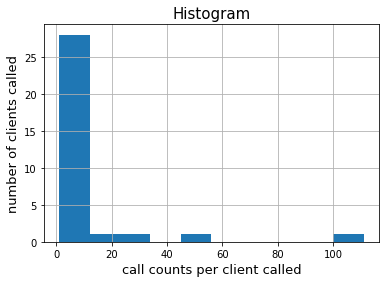

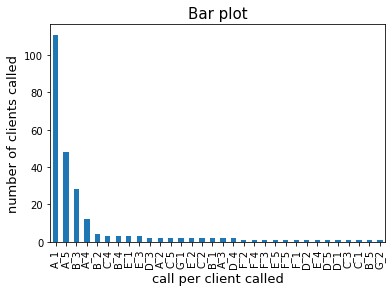

In [17]:
outgoing_call_frequent.hist(column='Date')
plt.title('Histogram', fontsize=15)
plt.xlabel('call counts per client called', fontsize=13)
plt.ylabel('number of clients called', fontsize=13)
plt.show()

outgoing_call_frequent['Date'].transpose().plot.bar()
plt.title('Bar plot', fontsize=15)
plt.xlabel('call per client called', fontsize=13)
plt.ylabel('number of clients called', fontsize=13)
plt.show()

# The x-axis of histogram is binned quantitative data, the x-axis of bar plot is categorical data. 

# Histogram shows the distribution of call counts per client called,
# while bar plot compares the frequency between outgoing call accounts. 

# 

# 2. The ergodicity problem in economics
### 2.3 Coding the problem
##### 1. Generate a pandas dataframe that simulates N coin tosses for w gamblers with the np.random.rand function. Set N=100 coin tosses and w=100 gamblers and add the prefix 'prob_' to the column name.

In [18]:
N,w = 100,100
prob = pd.DataFrame(np.random.rand(N,w)) 
prob = prob.add_prefix('prob_')
prob

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,prob_90,prob_91,prob_92,prob_93,prob_94,prob_95,prob_96,prob_97,prob_98,prob_99
0,0.217574,0.186237,0.302926,0.867645,0.829513,0.170820,0.140161,0.712668,0.335843,0.680468,...,0.459623,0.510294,0.488210,0.633169,0.136481,0.423568,0.361145,0.847311,0.115807,0.041115
1,0.158344,0.295952,0.485014,0.586239,0.184667,0.497082,0.509584,0.081353,0.421443,0.607752,...,0.908066,0.198643,0.668859,0.485928,0.108948,0.524829,0.777174,0.821104,0.708499,0.391793
2,0.554891,0.498003,0.536866,0.766737,0.894030,0.971996,0.612263,0.193843,0.334503,0.125415,...,0.722019,0.567095,0.687206,0.731106,0.031553,0.768977,0.125028,0.505155,0.262913,0.880073
3,0.763422,0.240749,0.289694,0.075631,0.097574,0.552887,0.850156,0.453114,0.897187,0.863244,...,0.917339,0.259183,0.063235,0.074756,0.457276,0.983094,0.295801,0.283211,0.598421,0.007034
4,0.575544,0.798065,0.878349,0.148937,0.078402,0.294569,0.617734,0.988824,0.819773,0.613498,...,0.381774,0.895995,0.189508,0.730217,0.410165,0.258283,0.142530,0.574118,0.107020,0.454173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.165552,0.728266,0.921160,0.336298,0.901392,0.767145,0.368878,0.938950,0.610307,0.334265,...,0.533410,0.973384,0.510052,0.360412,0.083068,0.923506,0.285758,0.173086,0.370111,0.362300
96,0.072058,0.065818,0.086925,0.782407,0.868995,0.838925,0.279174,0.416920,0.487475,0.731675,...,0.273049,0.968564,0.298788,0.013756,0.387754,0.278152,0.153283,0.142118,0.549291,0.147215
97,0.559474,0.137326,0.715581,0.910331,0.370972,0.741346,0.772719,0.041742,0.258061,0.397060,...,0.844973,0.151268,0.883019,0.521060,0.338684,0.206444,0.406284,0.910901,0.149502,0.089519
98,0.795946,0.474344,0.307933,0.437702,0.394075,0.888107,0.762296,0.310572,0.873236,0.586067,...,0.480201,0.548036,0.537642,0.075525,0.721704,0.195867,0.259403,0.489056,0.548289,0.561590


##### 2. Initialize an additional w columns ['balance_' + str(x)] with the value 100 to capture the initial wealth of 100$, where: x in range(0, w).

In [19]:
value = 100 * pd.DataFrame(np.ones(shape=(N,w)))
value = value.add_prefix('balance_')

In [20]:
df = pd.concat([prob,value],axis=1)
df

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,balance_90,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99
0,0.217574,0.186237,0.302926,0.867645,0.829513,0.170820,0.140161,0.712668,0.335843,0.680468,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,0.158344,0.295952,0.485014,0.586239,0.184667,0.497082,0.509584,0.081353,0.421443,0.607752,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,0.554891,0.498003,0.536866,0.766737,0.894030,0.971996,0.612263,0.193843,0.334503,0.125415,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
3,0.763422,0.240749,0.289694,0.075631,0.097574,0.552887,0.850156,0.453114,0.897187,0.863244,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,0.575544,0.798065,0.878349,0.148937,0.078402,0.294569,0.617734,0.988824,0.819773,0.613498,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.165552,0.728266,0.921160,0.336298,0.901392,0.767145,0.368878,0.938950,0.610307,0.334265,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
96,0.072058,0.065818,0.086925,0.782407,0.868995,0.838925,0.279174,0.416920,0.487475,0.731675,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
97,0.559474,0.137326,0.715581,0.910331,0.370972,0.741346,0.772719,0.041742,0.258061,0.397060,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
98,0.795946,0.474344,0.307933,0.437702,0.394075,0.888107,0.762296,0.310572,0.873236,0.586067,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


##### 3. Create a two-level for loop that iterates through rows 1 to N first and columns w to 2xw next implementing the calculation logic for every prob-balance pair:
 
${Balance^i = 1.5 * Balance^{i-1}}$, if ${prob^{i-1} >= 0.5}$ 
<br>
&emsp; ${0.6 * Balance^{i-1}}$, if ${prob^{i-1} < 0.5}$ 

In [21]:
for i in range(0,N-1):
    for j in np.arange(w,2*w):
        if df.iloc[i,j-w] >= 0.5:   
            df.iloc[i+1,j] = 1.5 * df.iloc[i,j]  
        else:
            df.iloc[i+1,j] = 0.6 * df.iloc[i,j] 
     
df

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,balance_90,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99
0,0.217574,0.186237,0.302926,0.867645,0.829513,0.170820,0.140161,0.712668,0.335843,0.680468,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,0.158344,0.295952,0.485014,0.586239,0.184667,0.497082,0.509584,0.081353,0.421443,0.607752,...,60.000000,150.000000,60.000000,150.000000,60.000000,60.000000,60.000000,150.000000,60.000000,60.000000
2,0.554891,0.498003,0.536866,0.766737,0.894030,0.971996,0.612263,0.193843,0.334503,0.125415,...,90.000000,90.000000,90.000000,90.000000,36.000000,90.000000,90.000000,225.000000,90.000000,36.000000
3,0.763422,0.240749,0.289694,0.075631,0.097574,0.552887,0.850156,0.453114,0.897187,0.863244,...,135.000000,135.000000,135.000000,135.000000,21.600000,135.000000,54.000000,337.500000,54.000000,54.000000
4,0.575544,0.798065,0.878349,0.148937,0.078402,0.294569,0.617734,0.988824,0.819773,0.613498,...,202.500000,81.000000,81.000000,81.000000,12.960000,202.500000,32.400000,202.500000,81.000000,32.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.165552,0.728266,0.921160,0.336298,0.901392,0.767145,0.368878,0.938950,0.610307,0.334265,...,16.569493,41.423733,4045.286459,6.627797,0.067869,258.898333,0.169672,0.424179,0.169672,0.010859
96,0.072058,0.065818,0.086925,0.782407,0.868995,0.838925,0.279174,0.416920,0.487475,0.731675,...,24.854240,62.135600,6067.929689,3.976678,0.040721,388.347500,0.101803,0.254507,0.101803,0.006515
97,0.559474,0.137326,0.715581,0.910331,0.370972,0.741346,0.772719,0.041742,0.258061,0.397060,...,14.912544,93.203400,3640.757813,2.386007,0.024433,233.008500,0.061082,0.152704,0.152704,0.003909
98,0.795946,0.474344,0.307933,0.437702,0.394075,0.888107,0.762296,0.310572,0.873236,0.586067,...,22.368816,55.922040,5461.136720,3.579011,0.014660,139.805100,0.036649,0.229057,0.091623,0.002346


##### 4. Plot the time trajectories (in gamble iterations) of the wealth per gambler and calculate how many gamblers have more than their initial 100$

In [22]:
wealth = df.iloc[:,100:200]
wealth

,balance_0,balance_1,balance_2,balance_3,balance_4,balance_5,balance_6,balance_7,balance_8,balance_9,...,balance_90,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,60.000000,60.000000,60.000000,150.000000,150.000000,60.000000,60.000000,150.000000,60.000000,150.000000,...,60.000000,150.000000,60.000000,150.000000,60.000000,60.000000,60.000000,150.000000,60.000000,60.000000
2,36.000000,36.000000,36.000000,225.000000,90.000000,36.000000,90.000000,90.000000,36.000000,225.000000,...,90.000000,90.000000,90.000000,90.000000,36.000000,90.000000,90.000000,225.000000,90.000000,36.000000
3,54.000000,21.600000,54.000000,337.500000,135.000000,54.000000,135.000000,54.000000,21.600000,135.000000,...,135.000000,135.000000,135.000000,135.000000,21.600000,135.000000,54.000000,337.500000,54.000000,54.000000
4,81.000000,12.960000,32.400000,202.500000,81.000000,81.000000,202.500000,32.400000,32.400000,202.500000,...,202.500000,81.000000,81.000000,81.000000,12.960000,202.500000,32.400000,202.500000,81.000000,32.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.651119,0.027147,0.424179,0.067869,1.060448,41.423733,0.067869,0.424179,0.169672,41.423733,...,16.569493,41.423733,4045.286459,6.627797,0.067869,258.898333,0.169672,0.424179,0.169672,0.010859
96,1.590671,0.040721,0.636269,0.040721,1.590671,62.135600,0.040721,0.636269,0.254507,24.854240,...,24.854240,62.135600,6067.929689,3.976678,0.040721,388.347500,0.101803,0.254507,0.101803,0.006515
97,0.954403,0.024433,0.381761,0.061082,2.386007,93.203400,0.024433,0.381761,0.152704,37.281360,...,14.912544,93.203400,3640.757813,2.386007,0.024433,233.008500,0.061082,0.152704,0.152704,0.003909
98,1.431604,0.014660,0.572642,0.091623,1.431604,139.805100,0.036649,0.229057,0.091623,22.368816,...,22.368816,55.922040,5461.136720,3.579011,0.014660,139.805100,0.036649,0.229057,0.091623,0.002346


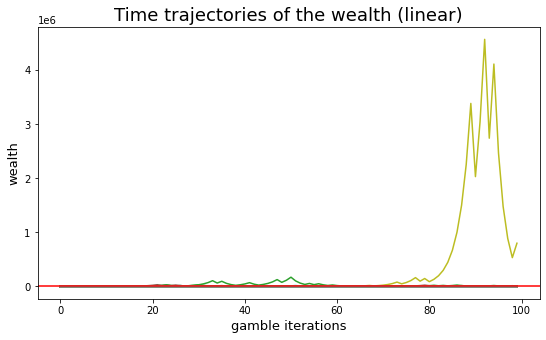

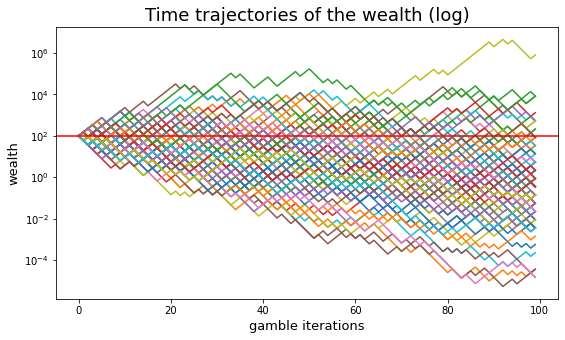

In [23]:
fig = plt.figure(figsize=(9,5))
plt.plot(wealth.index, wealth)
plt.axhline(y=100, color='r', linestyle='-')
plt.title('Time trajectories of the wealth (linear)', fontsize=18)
plt.xlabel('gamble iterations', fontsize=13)
plt.ylabel('wealth', fontsize=13)
plt.show()

fig = plt.figure(figsize=(9,5))
plt.plot(wealth.index, wealth)
plt.axhline(y=100, color='r', linestyle='-')
plt.title('Time trajectories of the wealth (log)', fontsize=18)
plt.xlabel('gamble iterations', fontsize=13)
plt.ylabel('wealth', fontsize=13)
plt.yscale('log')
plt.show()

In [24]:
print ((wealth.iloc[99] > 100).sum(), 'gamblers have more than their initial 100')

12 gamblers have more than their initial 100


##### What happens when you increase N to 1,000 (Figure 2 in the original paper, except the red and blue line)? How many gamblers with more than 100 do you have at t=1,000?

In [25]:
N,w = 1000,100
prob = pd.DataFrame(np.random.rand(N,w)) 
prob = prob.add_prefix('prob_')
value = 100 * pd.DataFrame(np.ones(shape=(N,w)))
value = value.add_prefix('balance_')
df = pd.concat([prob,value],axis=1)

for i in range(0,N-1):
    for j in np.arange(w,2*w):
        if df.iloc[i,j-w] >= 0.5:   
            df.iloc[i+1,j] = 1.5 * df.iloc[i,j]  
        else:
            df.iloc[i+1,j] = 0.6 * df.iloc[i,j] 
     
wealth = df.iloc[:,100:200]
wealth

,balance_0,balance_1,balance_2,balance_3,balance_4,balance_5,balance_6,balance_7,balance_8,balance_9,...,balance_90,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99
0,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
1,1.500000e+02,1.500000e+02,6.000000e+01,1.500000e+02,60.000000,1.500000e+02,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,...,6.000000e+01,1.500000e+02,1.500000e+02,1.500000e+02,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,1.500000e+02,1.500000e+02
2,9.000000e+01,9.000000e+01,3.600000e+01,9.000000e+01,90.000000,2.250000e+02,9.000000e+01,9.000000e+01,3.600000e+01,9.000000e+01,...,3.600000e+01,2.250000e+02,9.000000e+01,2.250000e+02,3.600000e+01,3.600000e+01,3.600000e+01,9.000000e+01,9.000000e+01,9.000000e+01
3,1.350000e+02,5.400000e+01,5.400000e+01,5.400000e+01,135.000000,3.375000e+02,5.400000e+01,5.400000e+01,2.160000e+01,5.400000e+01,...,2.160000e+01,1.350000e+02,5.400000e+01,1.350000e+02,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01
4,2.025000e+02,3.240000e+01,3.240000e+01,8.100000e+01,81.000000,2.025000e+02,3.240000e+01,8.100000e+01,1.296000e+01,8.100000e+01,...,3.240000e+01,2.025000e+02,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,3.240000e+01,3.240000e+01,8.100000e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6.333716e-15,1.583429e-14,1.140981e-25,1.088124e-21,0.005494,2.720310e-21,2.852452e-25,4.250485e-20,2.656553e-19,4.456956e-24,...,1.740999e-22,1.621431e-16,3.958573e-14,1.114239e-23,1.062621e-19,1.114239e-23,2.991013e-29,4.150864e-18,1.196405e-29,1.140981e-25
996,3.800230e-15,2.375144e-14,6.845885e-26,6.528745e-22,0.003296,1.632186e-21,1.711471e-25,6.375727e-20,3.984830e-19,6.685435e-24,...,1.044599e-22,2.432147e-16,2.375144e-14,1.671359e-23,1.593932e-19,1.671359e-23,4.486519e-29,2.490518e-18,1.794608e-29,6.845885e-26
997,2.280138e-15,3.562715e-14,4.107531e-26,9.793117e-22,0.001978,2.448279e-21,1.026883e-25,3.825436e-20,5.977244e-19,4.011261e-24,...,1.566899e-22,3.648220e-16,1.425086e-14,1.002815e-23,9.563591e-20,2.507038e-23,6.729779e-29,3.735778e-18,1.076765e-29,1.026883e-25
998,3.420207e-15,2.137629e-14,2.464519e-26,1.468968e-21,0.002967,1.468968e-21,1.540324e-25,2.295262e-20,3.586347e-19,6.016891e-24,...,9.401392e-23,2.188932e-16,8.550517e-15,1.504223e-23,1.434539e-19,1.504223e-23,1.009467e-28,5.603667e-18,6.460588e-30,6.161297e-26


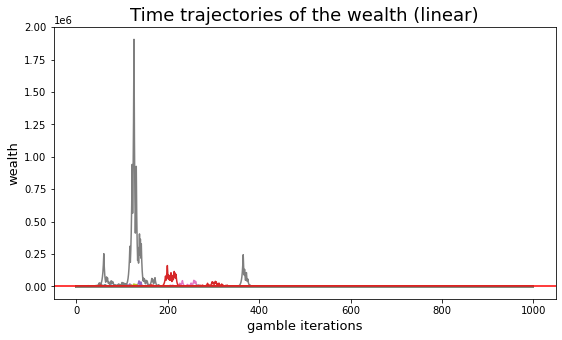

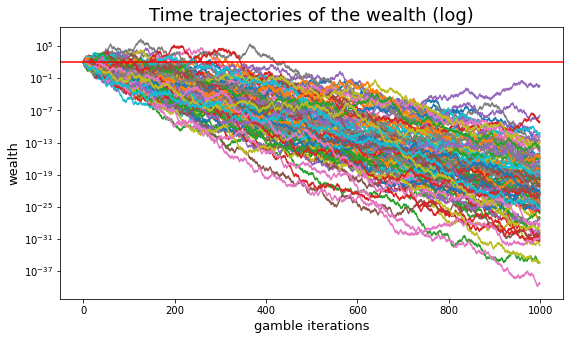

In [26]:
fig = plt.figure(figsize=(9,5))
plt.plot(wealth.index, wealth)
plt.axhline(y=100, color='r', linestyle='-')
plt.title('Time trajectories of the wealth (linear)', fontsize=18)
plt.xlabel('gamble iterations', fontsize=13)
plt.ylabel('wealth', fontsize=13)
plt.show()

fig = plt.figure(figsize=(9,5))
plt.plot(wealth.index, wealth)
plt.axhline(y=100, color='r', linestyle='-')
plt.title('Time trajectories of the wealth (log)', fontsize=18)
plt.xlabel('gamble iterations', fontsize=13)
plt.ylabel('wealth', fontsize=13)
plt.yscale('log')
plt.show()

In [27]:
# when increase N to 1,000, no people end with money over $100, the results for gambler are worse
# than 100 coin tosses.

print ((wealth.iloc[999] > 100).sum(), 'gamblers have more than their initial 100')

0 gamblers have more than their initial 100


##### 5. Plot the time trajectories of the mean and median wealth at every time point from 0 to 1,000. Try both linear and logarithmic scaler for the wealth axis. What are your observations?

In [28]:
characteristics = pd.DataFrame([wealth.mean(axis=1), wealth.median(axis=1)]).transpose()
characteristics.columns = ['mean','median']
characteristics

,mean,median
0,100.000000,1.000000e+02
1,105.000000,1.050000e+02
2,109.710000,9.000000e+01
3,115.884000,9.450000e+01
4,124.278300,8.100000e+01
...,...,...
995,0.000055,1.700194e-20
996,0.000033,1.785204e-20
997,0.000020,1.530175e-20
998,0.000030,1.606683e-20


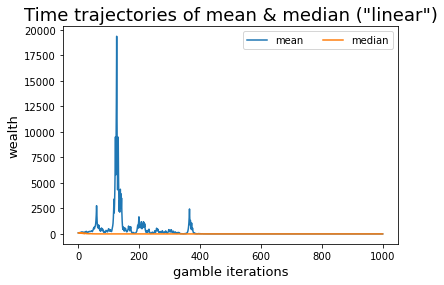

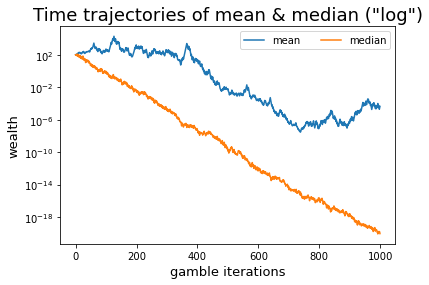

In [29]:
plt.plot(characteristics.index, characteristics)
plt.title('Time trajectories of mean & median ("linear")', fontsize=18)
plt.xlabel('gamble iterations', fontsize=13)
plt.ylabel('wealth', fontsize=13) 
plt.yscale('linear')
plt.legend(characteristics.columns, loc='best', ncol=3)
plt.show()

plt.plot(characteristics.index, characteristics)
plt.title('Time trajectories of mean & median ("log")', fontsize=18)
plt.xlabel('gamble iterations', fontsize=13)
plt.ylabel('wealth', fontsize=13) 
plt.yscale('log')
plt.legend(characteristics.columns, loc='best', ncol=3)
plt.show()

In [30]:
# Both mean and median are on a downward trajectory as N increase.
# The mean provides better result than median, since it's biased more by the large values. 

# Linear scaler visualize the absolute dollar change, the difference between mean and median is large 
# before t = 300, mean and median are close after t = 300. 
# Logarithmic scaler visualize the percentage dollor change. the gap between mean and median gradually increased.

###### 6. Repeat steps 3-5 with N=10 and w=1,000 with the following logic. How are the results different than the previous logic?
${Balance^i = Balance^{i-1} + 50}$, if ${prob^{i-1} >= 0.5}$ 
<br>
&emsp; ${Balance^{i-1} - 40}$, if ${prob^{i-1} < 0.5}$ 

In [31]:
N,w = 10,1000
prob = pd.DataFrame(np.random.rand(N,w)) 
prob = prob.add_prefix('prob_')
value = 100 * pd.DataFrame(np.ones(shape=(N,w)))
value = value.add_prefix('balance_')
df = pd.concat([prob,value],axis=1)

In [32]:
for i in range(0,N-1):
    for j in np.arange(w,2*w):
        if df.iloc[i,j-w] >= 0.5:   
            df.iloc[i+1,j] = df.iloc[i,j] + 50 
        else:
            df.iloc[i+1,j] = df.iloc[i,j] - 40

wealth = df.iloc[:,w:2*w]
wealth

,balance_0,balance_1,balance_2,balance_3,balance_4,balance_5,balance_6,balance_7,balance_8,balance_9,...,balance_990,balance_991,balance_992,balance_993,balance_994,balance_995,balance_996,balance_997,balance_998,balance_999
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,60.0,150.0,150.0,150.0,60.0,60.0,150.0,150.0,150.0,60.0,...,150.0,150.0,150.0,150.0,150.0,60.0,150.0,60.0,60.0,150.0
2,110.0,110.0,110.0,110.0,20.0,110.0,110.0,110.0,110.0,20.0,...,110.0,110.0,110.0,200.0,200.0,20.0,200.0,20.0,20.0,200.0
3,70.0,160.0,160.0,70.0,-20.0,70.0,70.0,70.0,160.0,70.0,...,160.0,160.0,160.0,160.0,250.0,70.0,160.0,-20.0,70.0,250.0
4,30.0,120.0,120.0,30.0,-60.0,30.0,120.0,120.0,210.0,30.0,...,120.0,210.0,210.0,120.0,300.0,120.0,120.0,30.0,30.0,210.0
5,80.0,80.0,80.0,80.0,-10.0,80.0,170.0,170.0,260.0,-10.0,...,170.0,260.0,260.0,80.0,350.0,80.0,170.0,80.0,80.0,170.0
6,40.0,130.0,40.0,40.0,-50.0,40.0,220.0,220.0,310.0,40.0,...,220.0,220.0,220.0,40.0,400.0,40.0,130.0,130.0,130.0,130.0
7,0.0,180.0,90.0,90.0,-90.0,0.0,270.0,270.0,360.0,0.0,...,180.0,270.0,180.0,0.0,450.0,90.0,90.0,180.0,90.0,90.0
8,50.0,230.0,140.0,50.0,-40.0,-40.0,320.0,320.0,320.0,50.0,...,140.0,320.0,140.0,50.0,500.0,140.0,50.0,230.0,50.0,140.0
9,100.0,280.0,190.0,10.0,10.0,-80.0,280.0,370.0,370.0,100.0,...,100.0,370.0,100.0,100.0,460.0,190.0,10.0,190.0,100.0,190.0


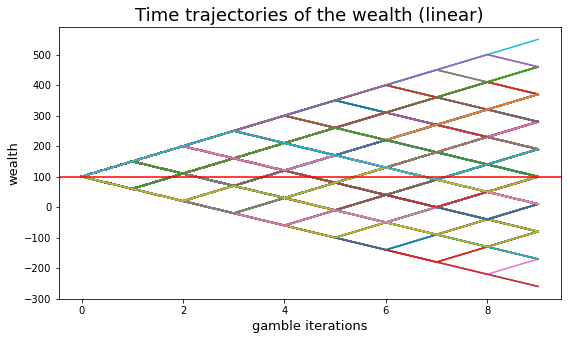

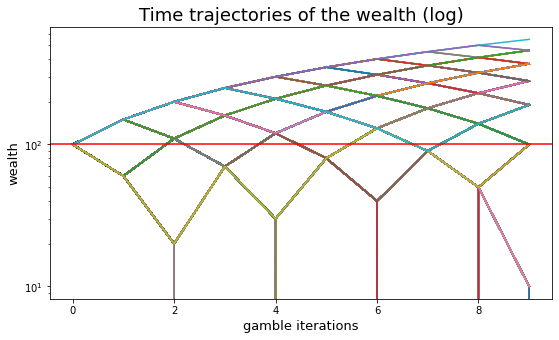

In [33]:
fig = plt.figure(figsize=(9,5))
plt.plot(wealth.index, wealth)
plt.axhline(y=100, color='r', linestyle='-')
plt.title('Time trajectories of the wealth (linear)', fontsize=18)
plt.xlabel('gamble iterations', fontsize=13)
plt.ylabel('wealth', fontsize=13)
plt.show()

fig = plt.figure(figsize=(9,5))
plt.plot(wealth.index, wealth)
plt.axhline(y=100, color='r', linestyle='-')
plt.title('Time trajectories of the wealth (log)', fontsize=18)
plt.xlabel('gamble iterations', fontsize=13)
plt.ylabel('wealth', fontsize=13)
plt.yscale('log')
plt.show()

In [34]:
print ((wealth.iloc[9] > 100).sum(), 'gamblers have more than their initial 100')

474 gamblers have more than their initial 100


In [35]:
characteristics = pd.DataFrame([wealth.mean(axis=1), wealth.median(axis=1)]).transpose()
characteristics.columns = ['mean','median']
characteristics

,mean,median
0,100.00,100.0
1,106.71,150.0
2,114.50,110.0
3,119.32,160.0
4,123.06,120.0
5,124.55,80.0
6,128.29,130.0
7,131.85,90.0
8,136.49,140.0
9,142.30,100.0


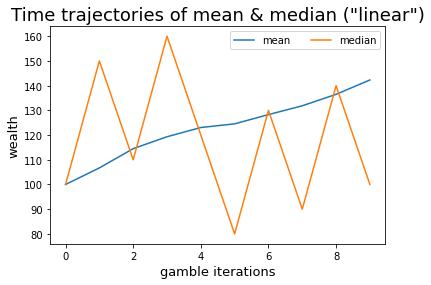

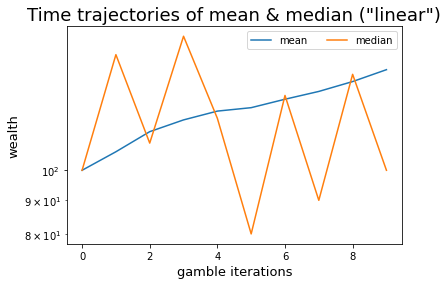

In [36]:
plt.plot(characteristics.index, characteristics)
plt.title('Time trajectories of mean & median ("linear")', fontsize=18)
plt.xlabel('gamble iterations', fontsize=13)
plt.ylabel('wealth', fontsize=13) 
plt.yscale('linear')
plt.legend(characteristics.columns, loc='best', ncol=3)
plt.show()

plt.plot(characteristics.index, characteristics)
plt.title('Time trajectories of mean & median ("linear")', fontsize=18)
plt.xlabel('gamble iterations', fontsize=13)
plt.ylabel('wealth', fontsize=13) 
plt.yscale('log')
plt.legend(characteristics.columns, loc='best', ncol=3)
plt.show()

In [37]:
# In the privious logic, both mean and median are on a downward trajectory as N increase. 
# But in this logic, both mean and median risen as N increase. And median is fluctuate around the mean.